In [2]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=54f961400855344230315192d19fc8ff3e98b18b2b1f38a5a66159cdbf655a27
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [12]:
import os

image_dir = "image_subset/"
if not os.path.exists(image_dir):
    os.makedirs(image_dir)


In [10]:
import face_recognition


In [7]:
pip install cmake


In [8]:
pip install dlib


In [2]:
import os
import glob
from google.colab import files
import shutil

In [16]:
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*.jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)

    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)

        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True

    return name, status

# Upload new image for testing
uploaded = files.upload()  # Upload the test image

# Test facial search
image_name = list(uploaded.keys())[0]
name, status = facial_search(image_name)

if status:
    print(f"Match found! Similar child ID: {name}")
else:
    print("No match found! Adding the new image to the dataset.")
    shutil.move(image_name, f"{image_dir}/{image_name}")


Saving leen.jpeg to leen (1).jpeg
Match found! Similar child ID: leenhay


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving leen.jpeg to leen (4).jpeg
Match found! Similar child ID: leenhay


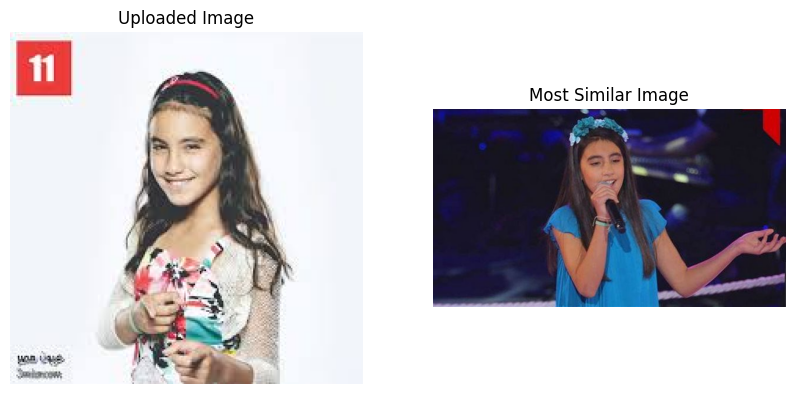

In [31]:
# Define a function to load and display images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(image_paths, titles):
    # Create subplots based on the number of images
    if len(image_paths) == 1:
        fig, ax = plt.subplots(figsize=(5, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 5))

    # Display each image
    for ax, img_path, title in zip(axes, image_paths, titles):
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')  # Hide axes

    plt.show()


ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    image_paths = []

    # Check the directory for existing images
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*.jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)
            image_paths.append(filename)

    # Get face encodings for the uploaded image
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for face_encoding in face_encodings:
        # Check for matches
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)

        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True
            similar_image_path = image_paths[first_match_index]
            return name, status, similar_image_path

    return name, status, None

# Upload new image for testing
uploaded = files.upload()  # Upload the test image

# Test facial search
image_name = list(uploaded.keys())[0]
name, status, similar_image_path = facial_search(image_name)

# Display the uploaded image and the most similar image
if status:
    print(f"Match found! Similar child ID: {name}")
    display_images([image_name, similar_image_path], ["Uploaded Image", "Most Similar Image"])
else:
    print("No match found! Adding the new image to the dataset.")
    shutil.move(image_name, f"{image_dir}/{image_name}")
    display_images([image_name], ["Uploaded Image"])


Saving mena.webp to mena.webp
Match found! Similar child ID: mara


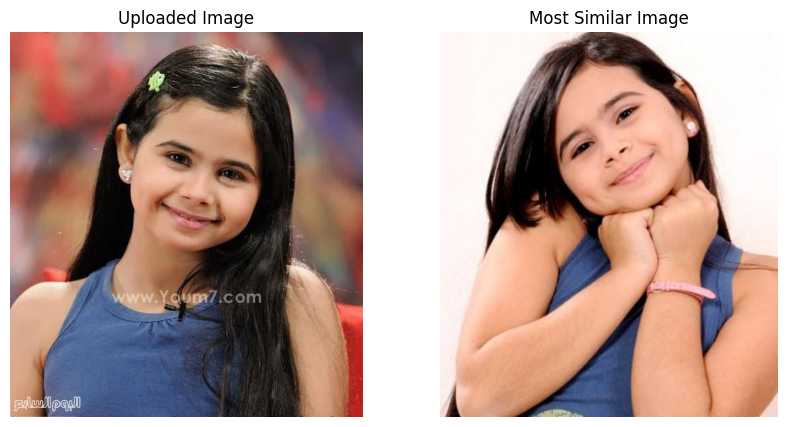

In [30]:
# Define a function to load and display images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io

def display_images(image_paths, titles, uploaded = None): # Added uploaded argument
    # Create subplots based on the number of images
    if len(image_paths) == 1:
        fig, ax = plt.subplots(figsize=(5, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 5))

    # Display each image
    for ax, img_path, title in zip(axes, image_paths, titles):
        if uploaded and img_path in uploaded: # Check if image is in uploaded
            img = Image.open(io.BytesIO(uploaded[img_path])) # Open from memory
        else:
            img = mpimg.imread(img_path) # Open from local file
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')  # Hide axes

    plt.show()


ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    image_paths = []

    # Check the directory for existing images
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*.jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)
            image_paths.append(filename)

    # Get face encodings for the uploaded image
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for face_encoding in face_encodings:
        # Check for matches
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)

        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True
            similar_image_path = image_paths[first_match_index]
            return name, status, similar_image_path

    return name, status, None

# Upload new image for testing
uploaded = files.upload()  # Upload the test image

# Test facial search
image_name = list(uploaded.keys())[0]
name, status, similar_image_path = facial_search(image_name)

# Display the uploaded image and the most similar image
if status:
    print(f"Match found! Similar child ID: {name}")
    display_images([image_name, similar_image_path], ["Uploaded Image", "Most Similar Image"], uploaded) # Pass uploaded to display_images
else:
    print("No match found! Adding the new image to the dataset.")
    shutil.move(image_name, f"{image_dir}/{image_name}")
    display_images([image_name], ["Uploaded Image"], uploaded) # Pass uploaded to display_images

Saving mizo.jpg to mizo (2).jpg
Match found! Similar child ID: mazenn


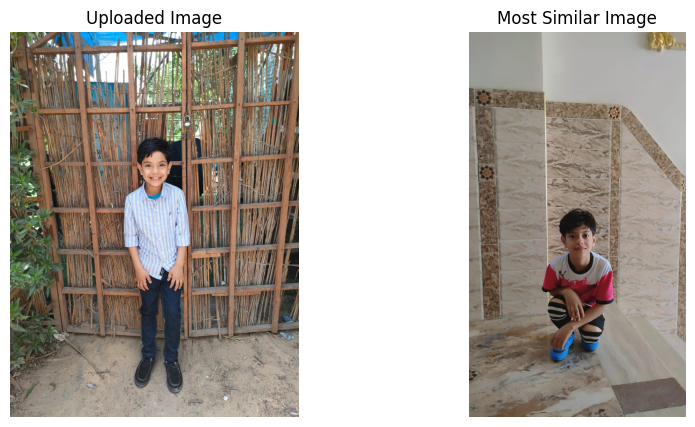

In [37]:
# Define a function to load and display images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io

def display_images(image_paths, titles, uploaded = None): # Added uploaded argument
    # Create subplots based on the number of images
    if len(image_paths) == 1:
        fig, ax = plt.subplots(figsize=(5, 5))
        axes = [ax]
    else:
        fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 5))

    # Display each image
    for ax, img_path, title in zip(axes, image_paths, titles):
        if uploaded and img_path in uploaded: # Check if image is in uploaded
            img = Image.open(io.BytesIO(uploaded[img_path])) # Open from memory
        else:
            img = mpimg.imread(img_path) # Open from local file
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')  # Hide axes

    plt.show()


ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    image_paths = []

    # Check the directory for existing images
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*.jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)
            image_paths.append(filename)

    # Get face encodings for the uploaded image
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for face_encoding in face_encodings:
        # Check for matches
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)

        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True
            similar_image_path = image_paths[first_match_index]
            return name, status, similar_image_path

    return name, status, None

# Upload new image for testing
uploaded = files.upload()  # Upload the test image

# Test facial search
image_name = list(uploaded.keys())[0]
name, status, similar_image_path = facial_search(image_name)

# Display the uploaded image and the most similar image
if status:
    print(f"Match found! Similar child ID: {name}")
    display_images([image_name, similar_image_path], ["Uploaded Image", "Most Similar Image"], uploaded) # Pass uploaded to display_images
else:
    print("No match found! Adding the new image to the dataset.")
    shutil.move(image_name, f"{image_dir}/{image_name}")
    display_images([image_name], ["Uploaded Image"], uploaded) # Pass uploaded to display_images

In [44]:
pip install streamlit face_recognition matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from PIL import Image
import numpy as np

# Define your facial search function
def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)

    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True

    return name, status

# Define a function to display images
def display_image(image_path, title):
    img = Image.open(image_path)
    st.image(img, caption=title)

# Streamlit app
st.title('Facial Recognition App')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image_path = "temp_uploaded_image.jpg"
    with open(image_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("Processing...")

    name, status = facial_search(image_path)

    if status:
        st.write(f"Match found! The image is similar to {name}.")
    else:
        st.write("No match found! Adding the new image to the dataset.")
        os.makedirs("image_subset", exist_ok=True)
        new_image_path = f"image_subset/{os.path.splitext(uploaded_file.name)[0]}.jpg"
        with open(new_image_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        display_image(new_image_path, "New Image Added to Dataset")


In [46]:
!pip install -q streamlit

In [47]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 3s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
npm notice 
npm notice New major version of npm available! 8.19.4 -> 10.8.3
npm notice Changelog: https://github.com/npm/cli/releases/tag/v10.8.3
npm notice Run npm install -g npm@10.8.3 to update!
npm notice 


In [48]:
%%writefile app.py
import streamlit as st
import face_recognition
import os
import glob
from PIL import Image

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)

    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True

    return name, status

def display_image(image_path, title):
    img = Image.open(image_path)
    st.image(img, caption=title)

st.title('Facial Recognition for Missing Children')

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image_path = "temp_uploaded_image.jpg"
    with open(image_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("Processing...")

    name, status = facial_search(image_path)

    if status:
        st.write(f"Match found! The image is similar to {name}.")
    else:
        st.write("No match found! Adding the new image to the dataset.")
        os.makedirs("image_subset", exist_ok=True)
        new_image_path = f"image_subset/{os.path.splitext(uploaded_file.name)[0]}.jpg"
        with open(new_image_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        display_image(new_image_path, "New Image Added to Dataset")


Writing app.py


In [52]:
# Install required libraries
!pip install -q streamlit pyngrok

# Create Streamlit app
%%writefile app.py
import streamlit as st
import face_recognition
import os
import glob
from PIL import Image

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)

    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True

    return name, status

def display_image(image_path, title):
    img = Image.open(image_path)
    st.image(img, caption=title)

st.title('Facial Recognition for Missing Children')

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image_path = "temp_uploaded_image.jpg"
    with open(image_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("Processing...")

    name, status = facial_search(image_path)

    if status:
        st.write(f"Match found! The image is similar to {name}.")
    else:
        st.write("No match found! Adding the new image to the dataset.")
        os.makedirs("image_subset", exist_ok=True)
        new_image_path = f"image_subset/{os.path.splitext(uploaded_file.name)[0]}.jpg"
        with open(new_image_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        display_image(new_image_path, "New Image Added to Dataset")


UsageError: Line magic function `%%writefile` not found.


In [55]:
%%writefile app.py
import streamlit as st
import face_recognition
import os
import glob
from PIL import Image

def facial_search(image_to_test):
    name = None
    status = False
    image_dir = "image_subset/"
    test_image = face_recognition.load_image_file(image_to_test)
    known_face_encodings = []
    known_face_names = []
    if os.path.exists(image_dir):
        for filename in glob.iglob(os.path.join(image_dir, '*jpg'), recursive=True):
            image = face_recognition.load_image_file(filename)
            image_face_encoding = face_recognition.face_encodings(image)[0]
            known_face_encodings.append(image_face_encoding)
            child_id = filename.split("/")[-1].split(".")[0]
            known_face_names.append(child_id)

    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.6)
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            status = True

    return name, status

def display_image(image_path, title):
    img = Image.open(image_path)
    st.image(img, caption=title)

st.title('Facial Recognition for Missing Children')

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image_path = "temp_uploaded_image.jpg"
    with open(image_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
    st.write("Processing...")

    name, status = facial_search(image_path)

    if status:
        st.write(f"Match found! The image is similar to {name}.")
    else:
        st.write("No match found! Adding the new image to the dataset.")
        os.makedirs("image_subset", exist_ok=True)
        new_image_path = f"image_subset/{os.path.splitext(uploaded_file.name)[0]}.jpg"
        with open(new_image_path, "wb") as f:
            f.write(uploaded_file.getbuffer())

        display_image(new_image_path, "New Image Added to Dataset")


Overwriting app.py


In [57]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.233.231.113


In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.233.231.113
your url is: https://many-dryers-nail.loca.lt
